In [1]:
#Importing the necessary packages 
from __future__ import absolute_import, division, print_function, unicode_literals

#This forces our notebook to use the latest version of tensorflow 
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


import os
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [7]:
#We need to import our data from the kaggle's datasets
#Obtaining our dataset from kaggle
#First the kaggle API should be uploaded to our current working directory
#Importing our data from Kaggle
os.environ['KAGGLE_CONFIG_DIR']='/content/'
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#Extracting the datasets
import zipfile

local_zip = '/content/chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
base_dir="/content/chest_xray"
train = "/content/chest_xray/train"
test = "/content/chest_xray/test"
val = "/content/chest_xray/val"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [19]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 2))

In [20]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [21]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [0]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [0]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [29]:
#Improving accuracy using callbacks 
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy', 
                             min_delta=0.05, 
                             patience=3, 
                             verbose=0, 
                             mode='auto', 
                             baseline=None, 
                             restore_best_weights=True
                            )

history=model.fit_generator(
    train_generator,
    callbacks=[early_stopping],
    epochs=15,
    validation_data=val_generator,
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 66 steps, validate for 17 steps
Epoch 1/15
66/66 [==============================] - 51s 779ms/step - loss: 0.1053 - accuracy: 0.9581 - val_loss: 1.9549 - val_accuracy: 0.7430
Epoch 2/15
66/66 [==============================] - 51s 774ms/step - loss: 0.0900 - accuracy: 0.9654 - val_loss: 1.2348 - val_accuracy: 0.7450
Epoch 3/15
66/66 [==============================] - 51s 774ms/step - loss: 0.0705 - accuracy: 0.9730 - val_loss: 2.3300 - val_accuracy: 0.7430
Epoch 4/15
66/66 [==============================] - 51s 776ms/step - loss: 0.0548 - accuracy: 0.9780 - val_loss: 2.7989 - val_accuracy: 0.7435


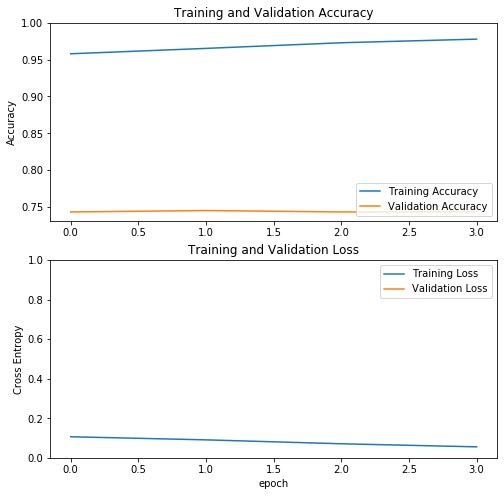

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
base_model.trainable = True

In [32]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [39]:
#Improving accuracy using callbacks 
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy', 
                             min_delta=0.05, 
                             patience=20, 
                             verbose=0, 
                             mode='auto', 
                             baseline=None, 
                             restore_best_weights=True
                            )

history=model.fit_generator(
    train_generator,
    callbacks=[early_stopping],
    epochs=20,
    validation_data=val_generator,
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 66 steps, validate for 17 steps
Epoch 1/20
66/66 [==============================] - 53s 802ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 3.8455 - val_accuracy: 0.8504
Epoch 2/20
66/66 [==============================] - 52s 793ms/step - loss: 0.0222 - accuracy: 0.9963 - val_loss: 12.8476 - val_accuracy: 0.7502
Epoch 3/20
66/66 [==============================] - 52s 781ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 19.2463 - val_accuracy: 0.7440
Epoch 4/20
66/66 [==============================] - 52s 784ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 40.6226 - val_accuracy: 0.7430
Epoch 5/20
66/66 [==============================] - 52s 782ms/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 53.0394 - val_accuracy: 0.7430
Epoch 6/20
66/66 [==============================] - 52s 788ms/step - loss: 0.0155 - accuracy: 0.9981 - val_loss: 9.1281 - val_accuracy: 0.7493
Epoch 7/20
66/66 [============================

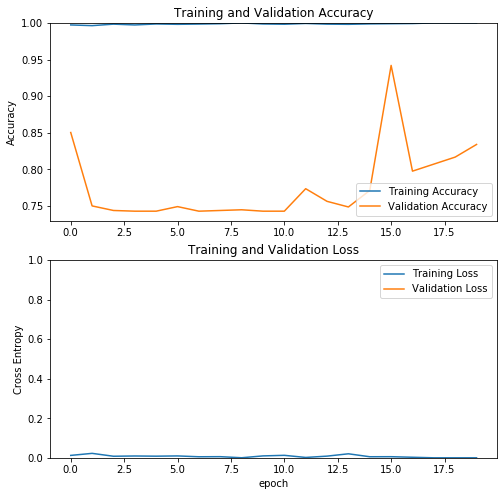

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [41]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: save/fine_tuning/assets
